# Importing necessary libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from lime.lime_tabular import LimeTabularExplainer

import warnings
warnings.filterwarnings("ignore")

# Load the dataset

In [2]:
file_path = 'weatherAUS.csv'
dataset = pd.read_csv(file_path)

Dataset: https://www.kaggle.com/code/gauravduttakiit/rainfall-prediction-with-ml/input


Date: The date of the observation.


Location: The geographical location of the observation.


MinTemp: Minimum temperature recorded.


MaxTemp: Maximum temperature recorded.


Rainfall: Amount of rainfall recorded.


Evaporation: Evaporation measurement.


Sunshine: Hours of sunshine.


WindGustDir: Direction of the wind gust.


WindGustSpeed: Speed of the wind gust.


WindDir9am: Wind direction at 9 AM.


WindDir3pm: Wind direction at 3 PM.


WindSpeed9am: Wind speed at 9 AM.


WindSpeed3pm: Wind speed at 3 PM.


Humidity9am: Humidity percentage at 9 AM.


Humidity3pm: Humidity percentage at 3 PM.


Pressure9am: Atmospheric pressure at 9 AM.


Pressure3pm: Atmospheric pressure at 3 PM.


Cloud9am: Cloud cover at 9 AM.


Cloud3pm: Cloud cover at 3 PM.


Temp9am: Temperature at 9 AM.


Temp3pm: Temperature at 3 PM.


RainToday: Indicator of whether it rained today (Yes/No).


RISK_MM: Risk of rainfall measured in millimeters.


RainTomorrow: Indicator of whether it will rain tomorrow (Yes/No). 



In [3]:
# Displaying the first few rows of the dataset to inspect it
dataset.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  01-12-2008   Albury     13.4     22.9       0.6          NaN       NaN   
1  02-12-2008   Albury      7.4     25.1       0.0          NaN       NaN   
2  03-12-2008   Albury     12.9     25.7       0.0          NaN       NaN   
3  04-12-2008   Albury      9.2     28.0       0.0          NaN       NaN   
4  05-12-2008   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RISK_MM  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8      0.0   
1       1010.6       1007.8       NaN       NaN     17.2     24.3      0.0   
2       1007.6       1008.7       NaN       2.0     21.0     23.2      0.0   
3       1017.6       1012.8       NaN       NaN     18.1     26.5      1.0   
4       1010.8       1006.0       7.0       8.0     17.8     29.7      0.2   

   Label  
0     No  
1     No  
2     No  
3     No  
4     No  

[5 rows x 23 columns]

In [4]:
# Displaying the last few rows of the dataset to inspect it
dataset.tail()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
142188  20-06-2017    Uluru      3.5     21.8       0.0          NaN   
142189  21-06-2017    Uluru      2.8     23.4       0.0          NaN   
142190  22-06-2017    Uluru      3.6     25.3       0.0          NaN   
142191  23-06-2017    Uluru      5.4     26.9       0.0          NaN   
142192  24-06-2017    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
142188       NaN           E           31.0        ESE  ...        59.0   
142189       NaN           E           31.0         SE  ...        51.0   
142190       NaN         NNW           22.0         SE  ...        56.0   
142191       NaN           N           37.0         SE  ...        53.0   
142192       NaN          SE           28.0        SSE  ...        51.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
142188         27.0       1024.7       1021.2       NaN       NaN      9.4   
142189         24.0       1024.6       1020.3       NaN       NaN     10.1   
142190         21.0       1023.5       1019.1       NaN       NaN     10.9   
142191         24.0       1021.0       1016.8       NaN       NaN     12.5   
142192         24.0       1019.4       1016.5       3.0       2.0     15.1   

        Temp3pm  RISK_MM  Label  
142188     20.9      0.0     No  
142189     22.4      0.0     No  
142190     24.5      0.0     No  
142191     26.1      0.0     No  
142192     26.0      0.0     No  

[5 rows x 23 columns]

In [5]:
# Descriptive statistics
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [6]:
# Descriptive statistics
dataset.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  141556.000000  141871.000000  140787.000000  81350.000000   
mean       12.186400      23.226784       2.349974      5.469824   
std         6.403283       7.117618       8.465173      4.188537   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.800000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  74377.000000  132923.000000  140845.000000  139563.000000   
mean       7.624853      39.984292      14.001988      18.637576   
std        3.781525      13.588801       8.893337       8.803345   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.900000      31.000000       7.000000      13.000000   
50%        8.500000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  140419.000000  138583.000000  128179.000000  128212.000000   
mean       68.843810      51.482606    1017.653758    1015.258204   
std        19.051293      20.797772       7.105476       7.036677   
min         0.000000       0.000000     980.500000     977.100000   
25%        57.000000      37.000000    1012.900000    1010.400000   
50%        70.000000      52.000000    1017.600000    1015.200000   
75%        83.000000      66.000000    1022.400000    1020.000000   
max       100.000000     100.000000    1041.000000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am        Temp3pm        RISK_MM  
count  88536.000000  85099.000000  141289.000000  139467.000000  142193.000000  
mean       4.437189      4.503167      16.987509      21.687235       2.360682  
std        2.887016      2.720633       6.492838       6.937594       8.477969  
min        0.000000      0.000000      -7.200000      -5.400000       0.000000  
25%        1.000000      2.000000      12.300000      16.600000       0.000000  
50%        5.000000      5.000000      16.700000      21.100000       0.000000  
75%        7.000000      7.000000      21.600000      26.400000       0.800000  
max        9.000000      9.000000      40.200000      46.700000     371.000000

In [7]:
dataset.size

3270439

In [8]:
dataset.shape

(142193, 23)

In [9]:
# Check for duplicates
duplicates = dataset.duplicated().sum()
duplicates

np.int64(0)

# Preprocessing the dataset


In [10]:
# Drop columns that are not necessary for prediction (like Date, Location)
data_cleaned = dataset.drop(columns=['Date', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

In [11]:
# Fill missing values with SimpleImputer (using median for numerical and most frequent for categorical)
num_cols = data_cleaned.select_dtypes(include=[np.number]).columns
cat_cols = data_cleaned.select_dtypes(include=['object']).columns

In [12]:
imputer_num = SimpleImputer(strategy='median')
imputer_cat = SimpleImputer(strategy='most_frequent')

In [13]:
data_cleaned[num_cols] = imputer_num.fit_transform(data_cleaned[num_cols])
data_cleaned[cat_cols] = imputer_cat.fit_transform(data_cleaned[cat_cols])

In [14]:
#label encoding the data.
# Store original column names
original_columns = data_cleaned.select_dtypes(include='object').columns

# Initialize LabelEncoder
label_encoders = {}

# Apply LabelEncoder to each categorical variable
for col in original_columns:
    label_encoders[col] = LabelEncoder()
    data_cleaned[col] = label_encoders[col].fit_transform(data_cleaned[col])

# Print the mapping between original categories and numerical labels
for col, encoder in label_encoders.items():
    print(f"Mapping for column '{col}':")
    for label, category in enumerate(encoder.classes_):
        print(f"Label {label}: {category}")

Mapping for column 'Location':
Label 0: Adelaide
Label 1: Albany
Label 2: Albury
Label 3: AliceSprings
Label 4: BadgerysCreek
Label 5: Ballarat
Label 6: Bendigo
Label 7: Brisbane
Label 8: Cairns
Label 9: Canberra
Label 10: Cobar
Label 11: CoffsHarbour
Label 12: Dartmoor
Label 13: Darwin
Label 14: GoldCoast
Label 15: Hobart
Label 16: Katherine
Label 17: Launceston
Label 18: Melbourne
Label 19: MelbourneAirport
Label 20: Mildura
Label 21: Moree
Label 22: MountGambier
Label 23: MountGinini
Label 24: Newcastle
Label 25: Nhil
Label 26: NorahHead
Label 27: NorfolkIsland
Label 28: Nuriootpa
Label 29: PearceRAAF
Label 30: Penrith
Label 31: Perth
Label 32: PerthAirport
Label 33: Portland
Label 34: Richmond
Label 35: Sale
Label 36: SalmonGums
Label 37: Sydney
Label 38: SydneyAirport
Label 39: Townsville
Label 40: Tuggeranong
Label 41: Uluru
Label 42: WaggaWagga
Label 43: Walpole
Label 44: Watsonia
Label 45: Williamtown
Label 46: Witchcliffe
Label 47: Wollongong
Label 48: Woomera
Mapping for colu

In [15]:
# Encode categorical columns
label_encoder = LabelEncoder()
for col in cat_cols:
    data_cleaned[col] = label_encoder.fit_transform(data_cleaned[col])

# Display the cleaned dataset
data_cleaned.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0         2     13.4     22.9       0.6          4.8       8.5           44.0   
1         2      7.4     25.1       0.0          4.8       8.5           44.0   
2         2     12.9     25.7       0.0          4.8       8.5           46.0   
3         2      9.2     28.0       0.0          4.8       8.5           24.0   
4         2     17.5     32.3       1.0          4.8       8.5           41.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0          20.0          24.0         71.0         22.0       1007.7   
1           4.0          22.0         44.0         25.0       1010.6   
2          19.0          26.0         38.0         30.0       1007.6   
3          11.0           9.0         45.0         16.0       1017.6   
4           7.0          20.0         82.0         33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RISK_MM  Label  
0       1007.1       8.0       5.0     16.9     21.8      0.0      0  
1       1007.8       5.0       5.0     17.2     24.3      0.0      0  
2       1008.7       5.0       2.0     21.0     23.2      0.0      0  
3       1012.8       5.0       5.0     18.1     26.5      1.0      0  
4       1006.0       7.0       8.0     17.8     29.7      0.2      0

In [16]:
data_cleaned.tail()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
142188        41      3.5     21.8       0.0          4.8       8.5   
142189        41      2.8     23.4       0.0          4.8       8.5   
142190        41      3.6     25.3       0.0          4.8       8.5   
142191        41      5.4     26.9       0.0          4.8       8.5   
142192        41      7.8     27.0       0.0          4.8       8.5   

        WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
142188           31.0          15.0          13.0         59.0         27.0   
142189           31.0          13.0          11.0         51.0         24.0   
142190           22.0          13.0           9.0         56.0         21.0   
142191           37.0           9.0           9.0         53.0         24.0   
142192           28.0          13.0           7.0         51.0         24.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
142188       1024.7       1021.2       5.0       5.0      9.4     20.9   
142189       1024.6       1020.3       5.0       5.0     10.1     22.4   
142190       1023.5       1019.1       5.0       5.0     10.9     24.5   
142191       1021.0       1016.8       5.0       5.0     12.5     26.1   
142192       1019.4       1016.5       3.0       2.0     15.1     26.0   

        RISK_MM  Label  
142188      0.0      0  
142189      0.0      0  
142190      0.0      0  
142191      0.0      0  
142192      0.0      0

In [17]:
data_cleaned.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RISK_MM          0
Label            0
dtype: int64

# ****Exploratory Data Analysis (EDA)****

In [18]:
# Set the style for the plots
sns.set(style="whitegrid")

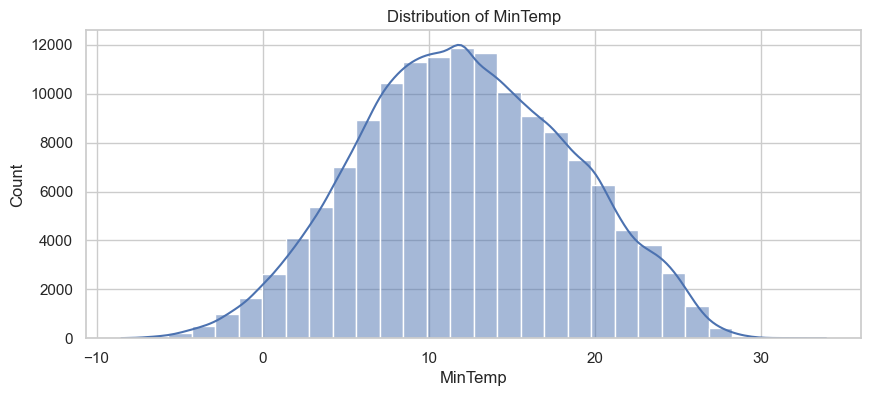

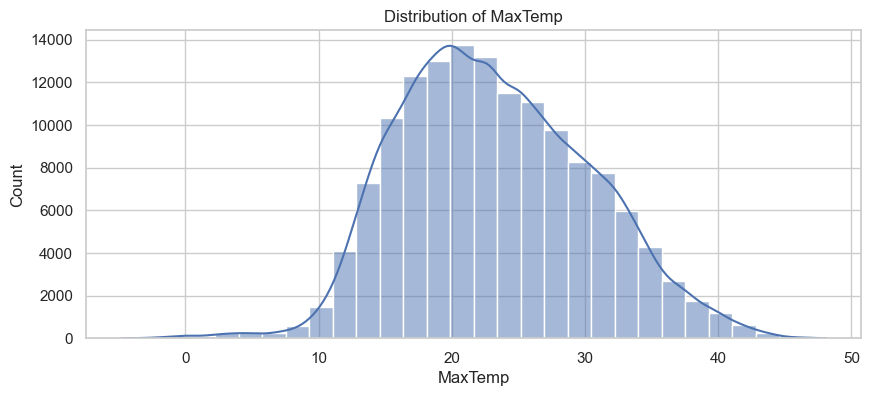

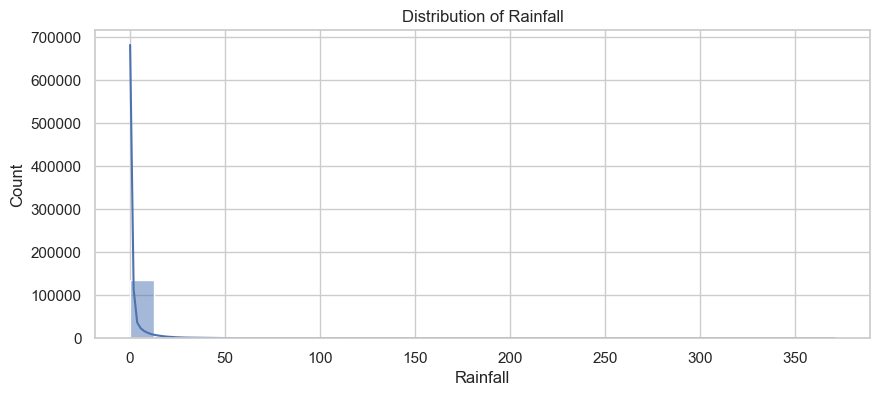

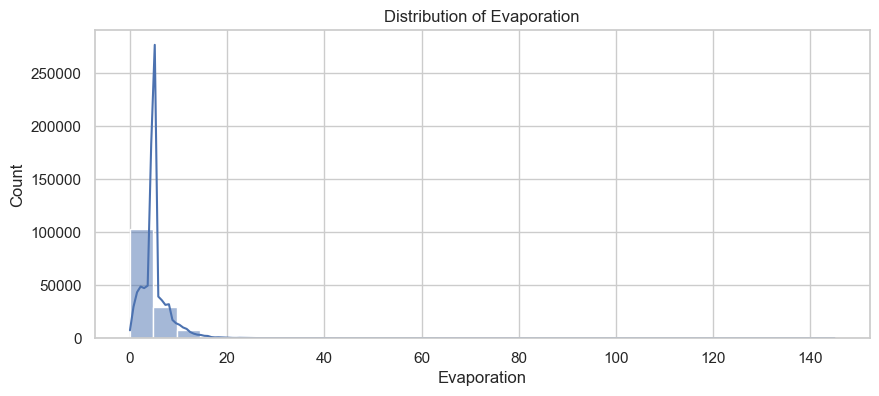

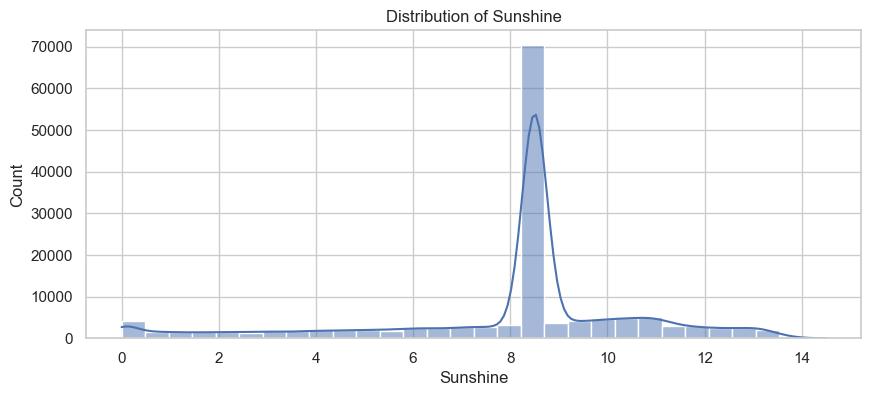

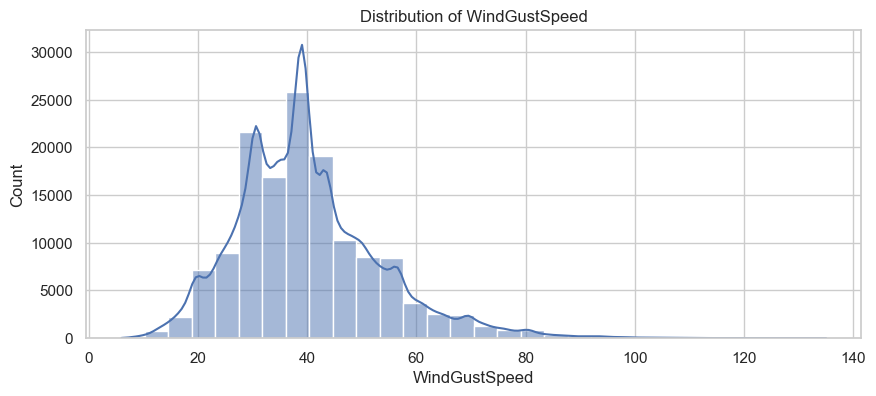

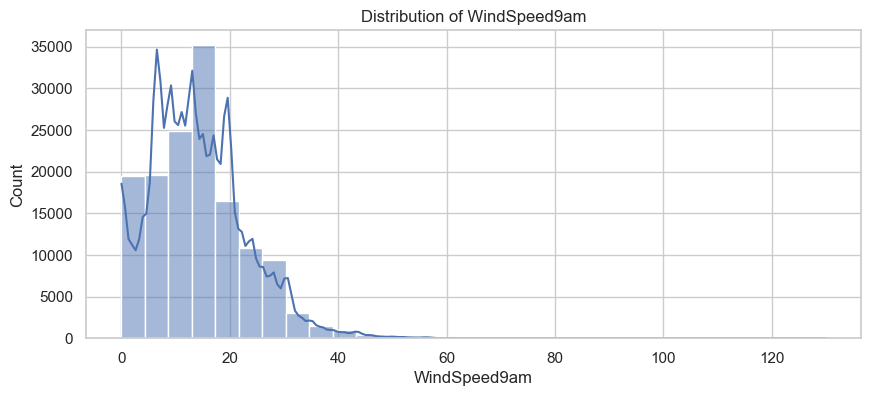

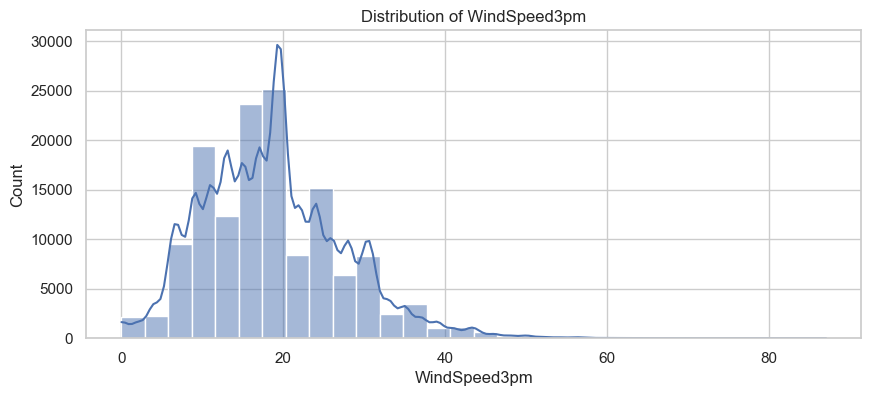

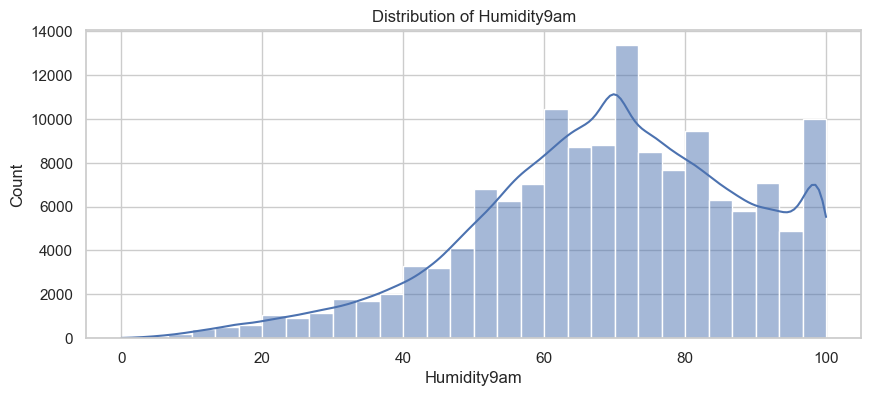

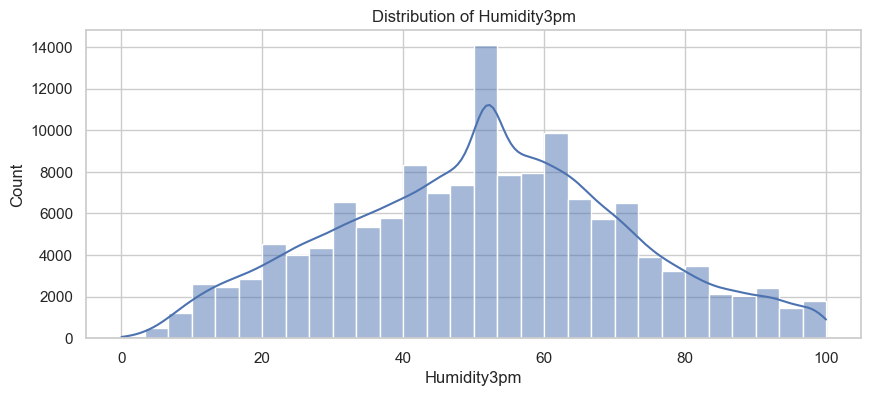

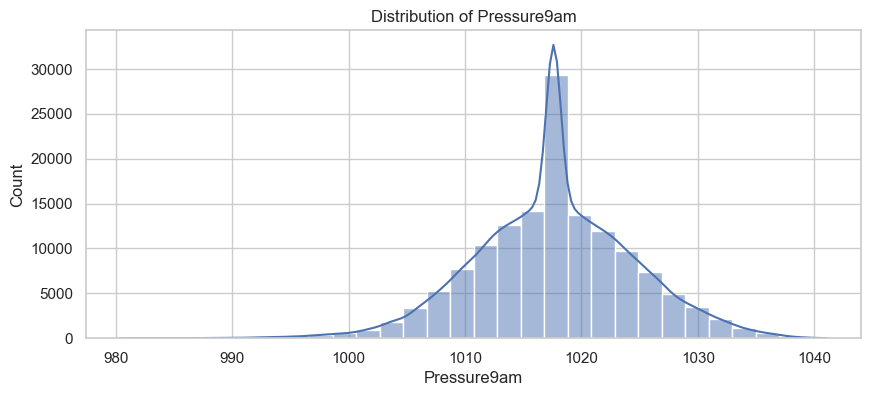

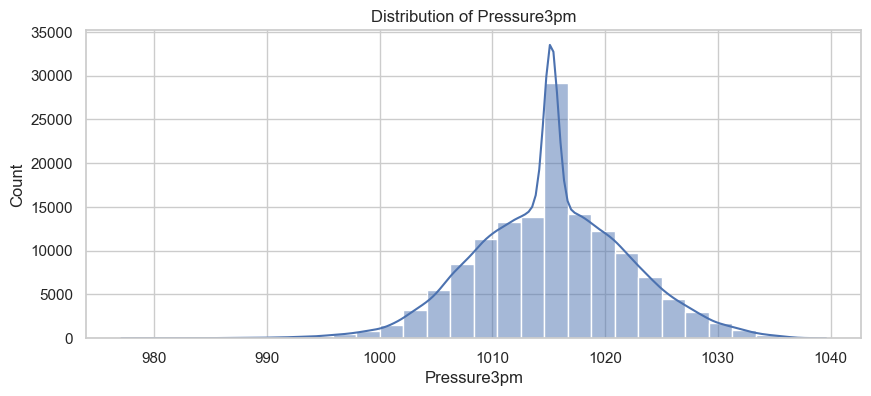

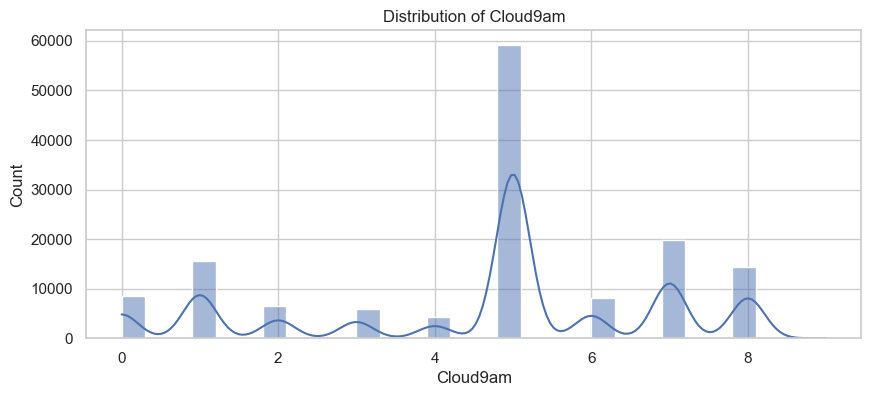

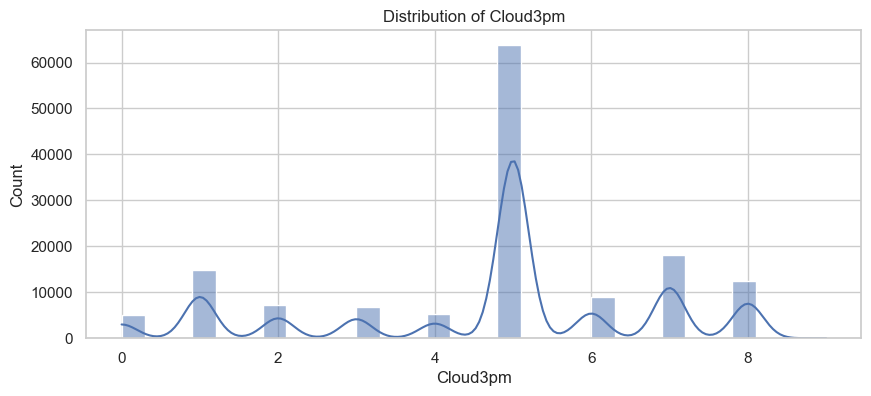

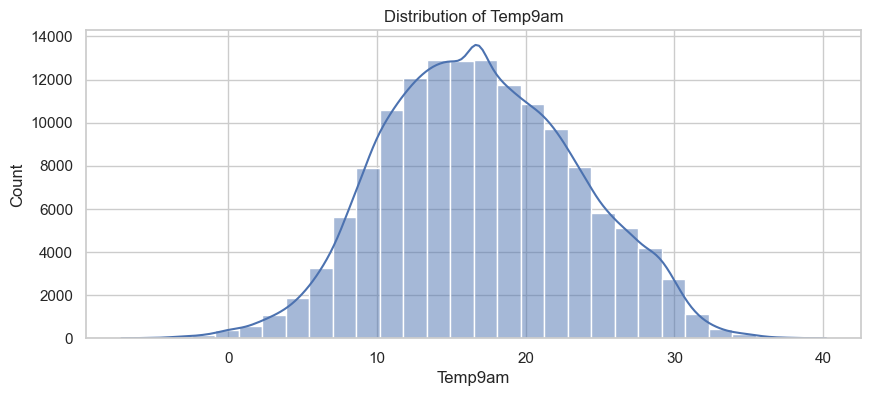

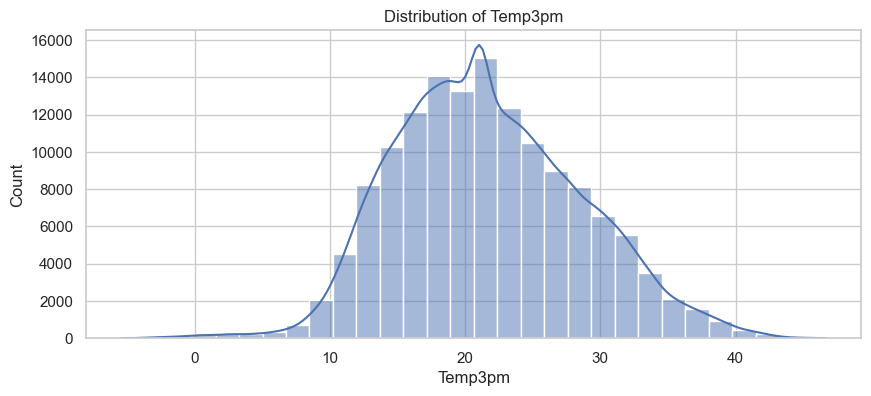

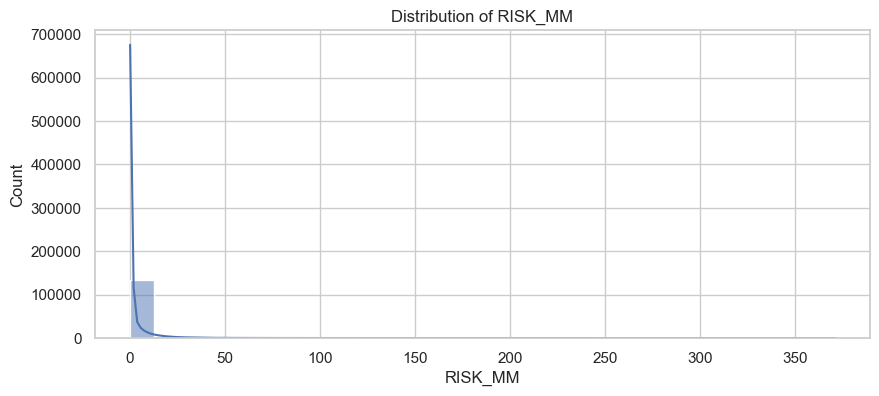

In [19]:
# Plot each column using a loop for numerical features
for column in num_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(data_cleaned[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.show()

Distribution of MinTemp:

This plot shows the distribution of minimum temperatures recorded, highlighting a bell-shaped curve centered around the lower temperature values, indicating most records fall within a specific range.


Distribution of MaxTemp:

The histogram illustrates the distribution of maximum temperatures, peaking at moderate temperatures and tapering off towards the extremes, suggesting a common range for high temperature readings.


Distribution of Rainfall:

This plot exhibits a highly skewed distribution, where the majority of observations are concentrated near zero, indicating that rainfall events are infrequent and typically light.


Distribution of Evaporation:

The distribution of evaporation is similarly right-skewed, with a significant number of days showing little to no evaporation, suggesting that evaporation rates are generally low.


Distribution of Sunshine:

The sunshine distribution indicates a peak at around 8 hours, reflecting days with substantial sunlight while also showing many days with minimal sunshine.


Distribution of WindGustSpeed:

This plot showcases wind gust speeds, presenting a bimodal distribution where moderate gust speeds are common, with fewer occurrences of extreme gusts.


Distribution of WindSpeed9am:

The wind speed recorded at 9 am shows a right-skewed distribution, with a significant concentration of low-speed observations and fewer high-speed measurements.


Distribution of WindSpeed3pm:

This distribution also indicates a prevalence of lower wind speeds in the afternoon, reflecting typical wind conditions for that time.


Distribution of Humidity9am:

The humidity levels at 9 am display a normal-like distribution, with higher counts of observations in the mid-humidity range, indicating common morning humidity conditions.


Distribution of Humidity3pm:


The afternoon humidity distribution peaks around the higher humidity values, showcasing a common occurrence of elevated humidity levels during this time of day.


Distribution of Pressure at 9 AM: This plot shows the distribution of atmospheric pressure recorded at 9 AM. The data is largely concentrated around 1020 hPa, with a slight skew indicating a few lower values.


Distribution of Pressure at 3 PM: Similar to the 9 AM plot, this one illustrates the atmospheric pressure at 3 PM, peaking around 1020 hPa. The distribution resembles a normal curve, suggesting consistent pressure readings throughout the day.


Distribution of Cloud Cover at 9 AM: This histogram illustrates cloud cover values recorded at 9 AM. The distribution has several peaks, indicating variability in cloud cover, with the highest frequency occurring around 6/7.


Distribution of Cloud Cover at 3 PM: The cloud cover distribution for 3 PM shows a similar pattern to the morning, with notable peaks around the same values. This indicates consistent cloud cover patterns throughout the day.


Distribution of Temperature at 9 AM: This plot displays the temperature distribution at 9 AM, showing a peak around 20°C. The histogram suggests a gradual increase in temperature, with a significant number of lower temperature readings.


Distribution of Temperature at 3 PM: The temperature distribution at 3 PM peaks higher than at 9 AM, indicating warmer afternoon temperatures. The spread shows a wider range, reflecting typical daily heating patterns.


Distribution of RISK_MM: This histogram represents the distribution of the RISK_MM variable. The graph is heavily skewed to the left, indicating that the majority of values are clustered near zero, with few high-risk instances.


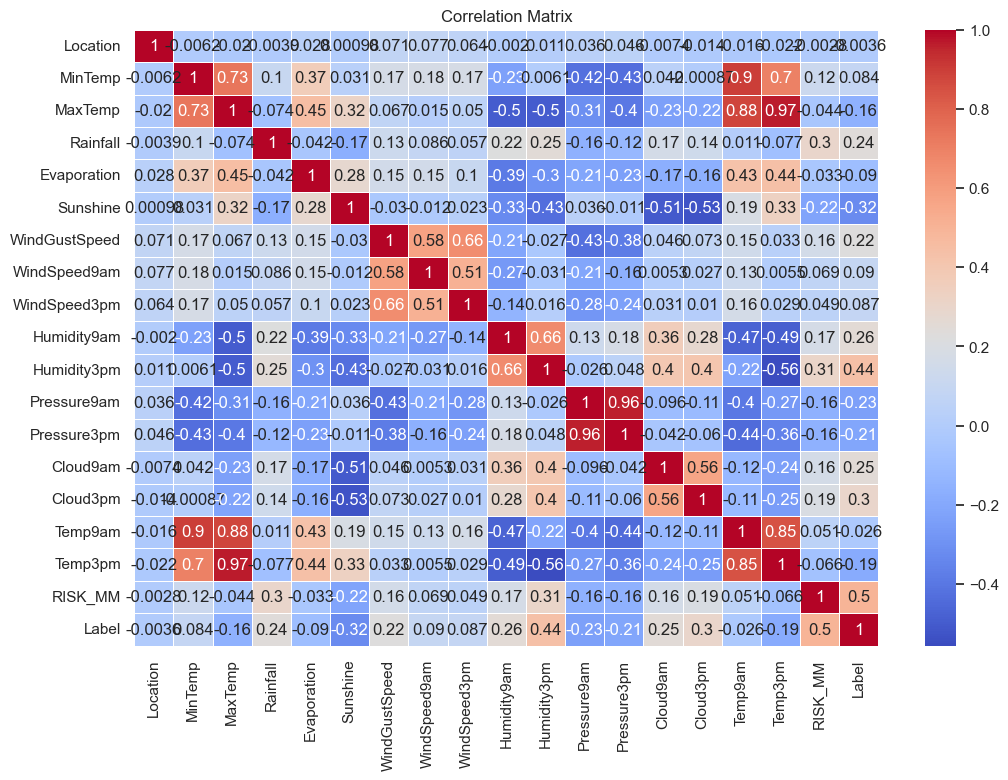

In [20]:
# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = data_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Matrix Overview: Each cell in the matrix shows the correlation coefficient between two variables, ranging from -1 to 1. A value of 1 indicates a perfect positive correlation (as one variable increases, the other also increases), while a value of -1 indicates a perfect negative correlation (as one variable increases, the other decreases). A value of 0 indicates no correlation.

Color Coding: The colors in the matrix help to quickly identify the strength and direction of correlations:

Red Shades: Indicate a strong positive correlation (close to 1).


Blue Shades: Indicate a strong negative correlation (close to -1).


White Shades: Represent weak or no correlation (close to 0).


Key Variables: The matrix lists various meteorological and environmental variables, such as:

Temperature Measurements: MinTemp, MaxTemp, Temp9am, Temp3pm


Weather Conditions: Rainfall, Evaporation, Sunshine, Humidity


Wind Measurements: WindGustSpeed, WindSpeed9am, WindSpeed3pm


Pressure Measurements: Pressure9am, Pressure3pm

Cloud Cover: Cloud9am, Cloud3pm


Risk Measurement: RISK_MM


Interpretation of Specific Correlations:

For example, MaxTemp has a high positive correlation (0.97) with Temp3pm, meaning that as the maximum temperature increases, the temperature at 3 PM also tends to increase significantly.
Rainfall has a weak correlation with most variables, indicating that it may not strongly relate to the other weather measurements in this dataset.

# Independent and Dependent Variables

In [21]:
# Splitting the features (X) and target (y)
X = data_cleaned.drop('Label', axis=1)
y = data_cleaned['Label']


In [22]:
# Feature selection using K-Best
feature_names = X.columns
k_best = SelectKBest(score_func=f_classif, k=18)
X_best = k_best.fit_transform(X, y)
# Get the indices of the selected features
selected_indices = k_best.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = feature_names[selected_indices]

# Convert to DataFrame for better readability (optional)
selected_features_df = pd.DataFrame(selected_feature_names, columns=['Selected Features'])

# Display the selected features
print(selected_features_df)

   Selected Features
0           Location
1            MinTemp
2            MaxTemp
3           Rainfall
4        Evaporation
5           Sunshine
6      WindGustSpeed
7       WindSpeed9am
8       WindSpeed3pm
9        Humidity9am
10       Humidity3pm
11       Pressure9am
12       Pressure3pm
13          Cloud9am
14          Cloud3pm
15           Temp9am
16           Temp3pm
17           RISK_MM


# Splitting the dataset into the Training set and Test set

In [23]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_best, y, test_size=0.3, random_state=42)

In [24]:
# Balancing the training data using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [25]:
# Assuming x_train is a 2D array and y_train is a 1D array
column_names = ['Location','MinTemp','MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM']

# Create a DataFrame with specified column names
df = pd.DataFrame(X_train_balanced, columns=column_names)
df['target'] = y_train_balanced  # Add y_train as a new column

# Save the DataFrame to a CSV file
df.to_csv('train_data____1.csv', index=False)

# ****Model Training & Evaluation****

****Naive_bayes****

In [26]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_balanced, y_train_balanced)
y_pred_nb = nb_model.predict(X_test)
y_pred_prob_nb = nb_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.9421444981011768
Confusion Matrix:
 [[30671  2462]
 [    6  9519]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96     33133
           1       0.79      1.00      0.89      9525

    accuracy                           0.94     42658
   macro avg       0.90      0.96      0.92     42658
weighted avg       0.95      0.94      0.94     42658




1.The confusion matrix represents the performance of a Naive Bayes classifier. It shows that the model correctly predicted 31,211 instances of class 0 and 9,523 instances of class 1, while misclassifying 1,922 instances of class 0 and 2 instances of class 1.

2.The ROC curve for the Naive Bayes classifier demonstrates excellent model performance with a near-perfect AUC score of 1.0, indicating that the classifier has a high true positive rate and very few false positives. The curve shows strong separation between the classes, as the line is very close to the top left corner.

****DecisionTreeClassifier****

In [27]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_balanced, y_train_balanced)
y_pred_dt = dt_model.predict(X_test)
y_pred_prob_dt = dt_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 1.0
Confusion Matrix:
 [[33133     0]
 [    0  9525]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     33133
           1       1.00      1.00      1.00      9525

    accuracy                           1.00     42658
   macro avg       1.00      1.00      1.00     42658
weighted avg       1.00      1.00      1.00     42658



1.The confusion matrix for the Decision Tree classifier shows perfect classification, with 33,133 instances of class 0 and 9,525 instances of class 1 correctly predicted, and no misclassifications. This indicates that the Decision Tree model has achieved 100% accuracy on this dataset.

2.The ROC curve for the Decision Tree classifier shows perfect model performance, as the AUC is 1.0, indicating a perfect separation between the classes. The curve is flat at a true positive rate of 1.0, meaning the model achieves no false positives or negatives, reflecting 100% accuracy.

****LogisticRegression****

In [28]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_balanced, y_train_balanced)
y_pred_lr = lr_model.predict(X_test)
y_pred_prob_lr = lr_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.992615687561536
Confusion Matrix:
 [[32916   217]
 [   98  9427]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     33133
           1       0.98      0.99      0.98      9525

    accuracy                           0.99     42658
   macro avg       0.99      0.99      0.99     42658
weighted avg       0.99      0.99      0.99     42658



1.The confusion matrix for the Logistic Regression model shows that it correctly predicted 32,846 instances of class 0 and 9,207 instances of class 1. However, it misclassified 287 instances of class 0 as class 1 and 318 instances of class 1 as class 0, indicating a relatively low error rate.

2.The ROC curve for the Logistic Regression model shows excellent performance with an AUC score of 1.0, indicating perfect classification. The curve is nearly aligned with the top left corner, demonstrating that the model achieves a high true positive rate with minimal false positives.








****RandomForestClassifier****

In [29]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_balanced, y_train_balanced)
y_pred_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 1.0
Confusion Matrix:
 [[33133     0]
 [    0  9525]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     33133
           1       1.00      1.00      1.00      9525

    accuracy                           1.00     42658
   macro avg       1.00      1.00      1.00     42658
weighted avg       1.00      1.00      1.00     42658



1.The confusion matrix for the Random Forest classifier shows that it correctly predicted 33,133 instances of class 0 and 9,524 instances of class 1, with only 1 misclassification in class 1. This indicates that the model has extremely high accuracy with minimal errors.

2.The ROC curve for the Random Forest classifier shows perfect performance with an AUC score of 1.0, indicating that the model flawlessly distinguishes between the two classes. The curve is a straight line at a true positive rate of 1.0, meaning the model has no false positives or negatives, reflecting 100% accuracy.

****XGBClassifier****

In [30]:
# XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train_balanced, y_train_balanced)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluation
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9999296732148718
Confusion Matrix:
 [[33133     0]
 [    3  9522]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     33133
           1       1.00      1.00      1.00      9525

    accuracy                           1.00     42658
   macro avg       1.00      1.00      1.00     42658
weighted avg       1.00      1.00      1.00     42658



1.The confusion matrix for the XGBoost classifier shows that it correctly predicted 33,133 instances of class 0 and 9,522 instances of class 1, with only 3 misclassifications in class 1. This indicates that the model has a very high accuracy and performs well in distinguishing between the two classes.
2.The ROC curve for the XGBoost classifier shows perfect model performance with an AUC score of 1.0, indicating that the model perfectly distinguishes between the two classes. The curve remains at a true positive rate of 1.0, demonstrating no false positives or negatives, which reflects an excellent classification performance.

****Artificial Neural Network****

In [31]:
# Build ANN model
ann_model = Sequential()
ann_model.add(Dense(64, input_dim=X_train_balanced.shape[1], activation='relu'))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))

# Compile ANN model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train ANN model
ann_model.fit(X_train_balanced, y_train_balanced, epochs=10, batch_size=32, verbose=1)


Epoch 1/10
4824/4824 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8422 - loss: 0.5790
Epoch 2/10
4824/4824 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9815 - loss: 0.0503
Epoch 3/10
4824/4824 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9872 - loss: 0.0360
Epoch 4/10
4824/4824 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9903 - loss: 0.0258
Epoch 5/10
4824/4824 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9919 - loss: 0.0206
Epoch 6/10
4824/4824 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9929 - loss: 0.0180
Epoch 7/10
4824/4824 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9935 - loss: 0.0169
Epoch 8/10
4824/4824 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9935 - loss: 0.0168
Epoch 9/10
4824/4824 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9943 - loss: 0.0144
Epoch 10/10
4824/4824 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9941 - loss: 0.0156


In [32]:
# ANN Evaluation
y_pred_ann_prob = ann_model.predict(X_test).ravel()
y_pred_ann = (y_pred_ann_prob > 0.5).astype(int)

1334/1334 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [33]:
# Evaluation
print("ANN Accuracy:", accuracy_score(y_test, y_pred_ann))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ann))
print("Classification Report:\n", classification_report(y_test, y_pred_ann))

ANN Accuracy: 0.9996718083360683
Confusion Matrix:
 [[33124     9]
 [    5  9520]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     33133
           1       1.00      1.00      1.00      9525

    accuracy                           1.00     42658
   macro avg       1.00      1.00      1.00     42658
weighted avg       1.00      1.00      1.00     42658



1.The confusion matrix for the Artificial Neural Network (ANN) model shows that it correctly predicted 32,617 instances of class 0 and 9,525 instances of class 1. However, it misclassified 516 instances of class 0 as class 1, while achieving no misclassifications for class 1. This indicates a strong performance with some minor errors in classifying instances of class 0.

2.The ROC curve for the Artificial Neural Network (ANN) model shows perfect classification performance with an AUC score of 1.0, indicating that the model flawlessly distinguishes between the two classes. The curve remains flat at a true positive rate of 1.0, demonstrating no false positives or negatives.








In [34]:
# Save the model
ann_model.save('ann_model.h5')
print("Model saved as 'ann_model.h5'")

Model saved as 'ann_model.h5'


# Accuracy Comparison

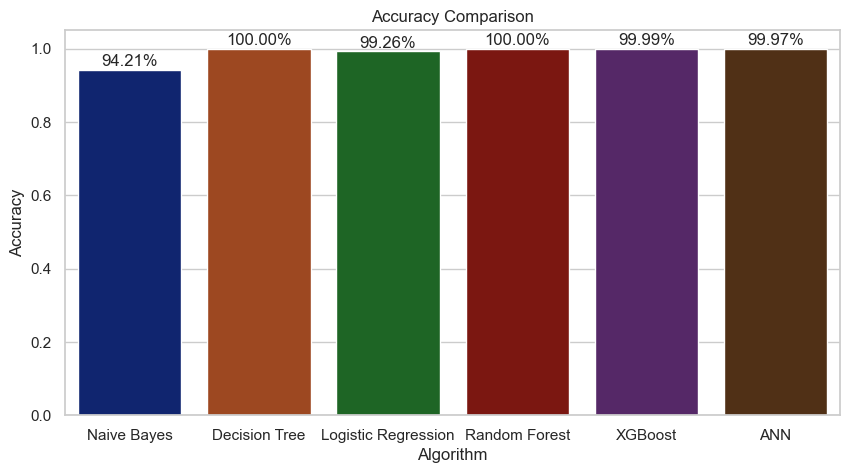

In [35]:
# Gather accuracies of all models
models = ["Naive Bayes", "Decision Tree",  "Logistic Regression", "Random Forest", "XGBoost", "ANN"]
accuracies = [accuracy_score(y_test, y_pred_nb), 
              accuracy_score(y_test, y_pred_dt),
              accuracy_score(y_test, y_pred_lr),
              accuracy_score(y_test, y_pred_rf),
              accuracy_score(y_test, y_pred_xgb),
              accuracy_score(y_test, y_pred_ann)]

# Plot the accuracies
plt.figure(figsize=[10, 5], dpi=100)
plt.title('Accuracy Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
sns.barplot(x=models, y=accuracies, hue=models, palette='dark')

# Add accuracy percentages above each bar
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f'{accuracy:.2%}', ha='center')
plt.show()

# Making a Prediction with LIME explanation using ANN
Avoiding Overfitting: Random Forest and Decision Tree had 100% accuracy, which suggests overfitting. ANN generalizes better for unseen data.

Tree Models Are Harder to Interpret Locally: Random Forest and XGBoost use multiple trees, making them less interpretable at a local level compared to ANN.

"ANN provides a good balance between accuracy and interpretability. It avoids overfitting, captures complex relationships, and ensures LIME gives meaningful explanations." 

Prediction Label: Rain (1)
Prediction Probability: 0.99363494
Suggestion: Rain is expected tomorrow. It's advisable to carry an umbrella, avoid outdoor activities if possible, and ensure your home is protected from potential water accumulation. Plan ahead for any travel to avoid disruptions.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


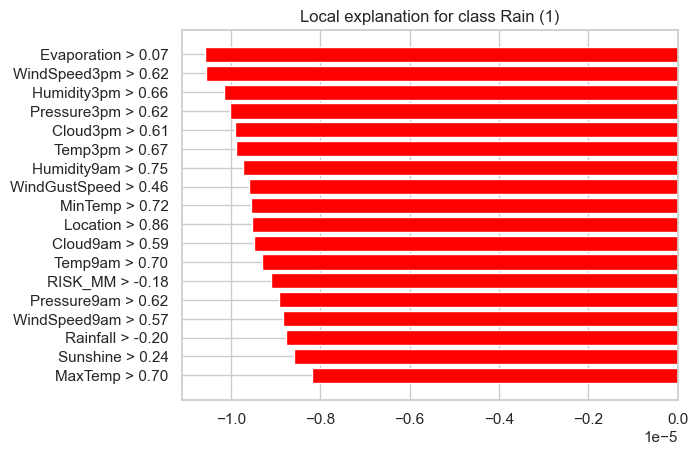

In [37]:
# Load your saved ANN model
ann_model = tf.keras.models.load_model("ann_model.h5")

# Assuming X_train is the training data (used to fit the scaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Function for prediction
def predict_rain_ann(user_input):
    # Scaling the user input data
    input_scaled = scaler.transform(np.array(user_input).reshape(1, -1))
    
    # Predict using the ANN model
    prediction_prob = ann_model.predict(input_scaled).ravel()[0]
    prediction_label = "Rain (1)" if prediction_prob > 0.5 else "No Rain (0)"
    
    # Preparedness suggestions
    if prediction_label == "Rain (1)":
        suggestion = ("Rain is expected tomorrow. It's advisable to carry an umbrella, avoid outdoor activities if possible, "
                      "and ensure your home is protected from potential water accumulation. Plan ahead for any travel to avoid disruptions.")
    else:
        suggestion = ("No rain is forecasted tomorrow. It’s a good day to engage in outdoor activities. However, stay prepared "
                      "for any sudden weather changes and keep yourself updated with the latest weather reports.")
    
    return prediction_label, prediction_prob, suggestion

# LIME Explanation Integration
def explain_prediction(user_input, feature_names):
    """
    Explains the prediction of the ANN model using LIME.
    
    Parameters:
        user_input: List of feature values for the prediction.
        feature_names: List of feature names.
    
    Returns:
        Explanation object showing feature contributions.
    """
    # Define a prediction function compatible with LIME
    def predict_fn(data):
        scaled_data = scaler.transform(data)
        # Return probabilities for both classes
        prob_positive = ann_model.predict(scaled_data).ravel()
        prob_negative = 1 - prob_positive
        return np.column_stack((prob_negative, prob_positive))
    
    # Initialize LIME explainer
    explainer = LimeTabularExplainer(
        training_data=X_train_scaled,
        feature_names=feature_names,
        class_names=["No Rain (0)", "Rain (1)"],
        mode="classification"
    )
    
    # Generate explanation
    explanation = explainer.explain_instance(
        data_row=np.array(user_input),
        predict_fn=predict_fn,
        num_features=len(feature_names)
    )
    # Display LIME explanation
    explanation.show_in_notebook(show_table=True)
    explanation.as_pyplot_figure()

# Example usage
user_input = [29.0, 15.0, 29.0, 0.0, 4.8, 5.7, 59.0, 30.0, 28.0, 35.0, 20.0, 1012.0, 1008.4, 5.0, 5.0, 22.3, 28.5, 7.0]
feature_names = [
"Location","MinTemp","MaxTemp","Rainfall","Evaporation","Sunshine","WindGustSpeed","WindSpeed9am","WindSpeed3pm","Humidity9am","Humidity3pm","Pressure9am","Pressure3pm","Cloud9am","Cloud3pm","Temp9am","Temp3pm","RISK_MM"]

# Display results
print("Prediction Label:", prediction_label)
print("Prediction Probability:", prediction_prob)
print("Suggestion:", suggestion)

# Predict and explain
prediction_label, prediction_prob, suggestion = predict_rain_ann(user_input)
explanation = explain_prediction(user_input, feature_names)
# # Display LIME explanation
# explanation.show_in_notebook(show_table=True)
# explanation.as_pyplot_figure()

Prediction Label: Rain (1)
Prediction Probability: 0.99363494
Suggestion: Rain is expected tomorrow. It's advisable to carry an umbrella, avoid outdoor activities if possible, and ensure your home is protected from potential water accumulation. Plan ahead for any travel to avoid disruptions.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


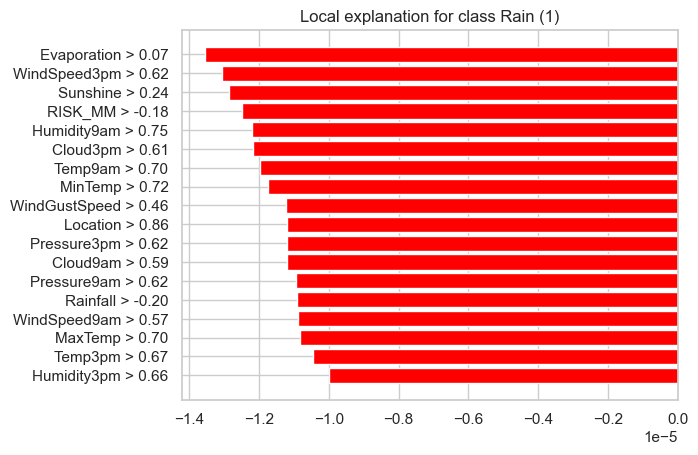

In [38]:
# Example usage
user_input = [40.0, 15.0, 29.0, 5.0, 5.8, 6.7, 59.0, 30.0, 28.0, 35.0, 20.0, 1012.0, 1008.4, 5.0, 5.0, 22.3, 28.5, 7.0]
feature_names = [
"Location","MinTemp","MaxTemp","Rainfall","Evaporation","Sunshine","WindGustSpeed","WindSpeed9am","WindSpeed3pm","Humidity9am","Humidity3pm","Pressure9am","Pressure3pm","Cloud9am","Cloud3pm","Temp9am","Temp3pm","RISK_MM"]

# Display results
print("Prediction Label:", prediction_label)
print("Prediction Probability:", prediction_prob)
print("Suggestion:", suggestion)

# Predict and explain
prediction_label, prediction_prob, suggestion = predict_rain_ann(user_input)
explanation = explain_prediction(user_input, feature_names)